# Support Vector Regression

Mathematics behind SVR: https://youtu.be/hCOIMkcsm_g

PDF: https://library.oapen.org/bitstream/handle/20.500.12657/28170/1001824.pdf?sequence=1&isAllowed=y 

(Chapter 4)

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Feature Scaling

Until now, we have had a split of the dataset between training set and the test set, but since the dataset is too small for this example, we are not spiltting the dataset into sets. So we need to apply feature scaling in a specific way for this example. That is because we want to leverage the maximum data in order to learn the correlations with the position salaries and levels.

Important Point:
1. We will apply feature scaling on the whole matrix of feature X.
2. Earlier, we only applied feature scaling to the X_train and X_test, and we did not apply it to the dependent variable y. In this case, we will apply feature to all the those because, upon looking at the dataset, we can see the difference between the values of Levels column, and Salary column. There is a huge difference, which can create a problem by not letting us analyze the data properly. So we need to apply feature scaling to those in this case. 

### When to apply Feature Scaling?
1. We do not apply feature scaling to some dummy variables resulting from onehotencoding.
2. We do not apply feature scaling when a dependent variable takes binary values like zero and one. (or either if the values are already in the right range)
3. We DO APPLY feature scaling when the dependent variable takes super high values with respect to the other features. We apply it to all the features, and the dependent variable in the same range.
4. We DO APPLY feature scaling whenever we want to split the dataset into the training set and the test set (after the split).

We need to change the format of the y dataset into a 2-D array, like the format X dataset has. Why do we need to do it?

That is because the standardScaler class (from sklearn.preprocessing import StandardScaler) that will perform standardization (feature scaling) expect one unique format in its input.


In [5]:
y = y.reshape(len(y), 1) 
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


We are ready to apply feature scaling. Grab the tool from the data preprocessing toolkit (feature scaling tool). Since we do not have a training and test set here, so we will not apply feature scaling to those sets. Instead we will apply feature scaling to the matrix of feature (X). That is what the first three lines of code are doing here.

Since we also need to scale the dependent variable vector, the salaries. We are not going to use the same standard scalar object on both the matrix of features X and the dependent variable vector y. That is because when we fit the object "sc" on the data, it computes the mean and the standard deviation of that variable. Since, we do not have the same mean and same standard deviation for all levels, and salaries, we need to create two standard objects, one that will fit X in order to compute the mean and SD of that position levels, and the other one, that will be fitted to y to compute the mean and SD of the salaries.

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)


In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


This finishes the data preprocessing part.

### Training the SVR model on the whole dataset

Now, we will build the model. We will build it with ski kit learn. We will build it with the SVR class, which belong to a module of skikit learn called SVM.

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')       # calling the class
# With this, we have created the SVR model. Now we need to train it
regressor.fit(X, y)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In the SVR regressor, we need to input something because of the kernels. We will learn about kernels later, but, to give an intution, kernels who learn some linear relationship are called linear kernel. Non linear kernel learn non linear relationship, and example of such kernel is radial basis function (rbf). That is what we are going to use in this example. To use it, all we need to do is input "kernel = 'rbf'" inside the regressor.

### Predicting the SVR Results

Since the matrix of feature (X) and the vector y was scaled before, we cannot input the value 6.5 in the predict function to obtain the desired result. This is how we did it earlier, but there was no feature scaling involved before. So we will not be able to use the directly 6.5. Rather, we need to scale the value 6.5 according to how we scaled the feature values. For that we need to call scalar object for X which is "sc_X" and from this object, apply the transformation. This is feature scale the value of 6.5.

In [15]:
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

We can see that the value is coming out to be decimals, which confirms that the predicted result is inlined with the scale. Even tho this result is correct, we need to convert this result back to the original scale. In other words, we need to reverse the scaling. 

This method is called "inverse transform method".

Any method has to be called from an object. Here the object is sc_y. That is because we want to reverse the scaling that was used to transform the dependent variable vector y.

In [16]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

Hence the result is in the correct scale and very close to our intution.

### Visualising the results from SVR Model

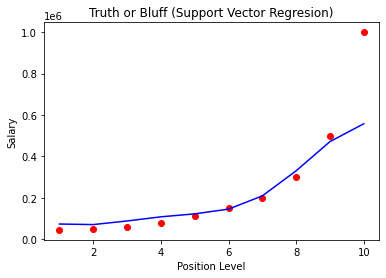

In [27]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regresion)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In the first two lines of code above, we need to use the inverse transform method so taht we can get values of back into the original scale. That is why we are using the "sc_X.inverse_transform(X)" and similarly for y.

### Visualising the results from SVR Model (for higher resolution and smoother curve)

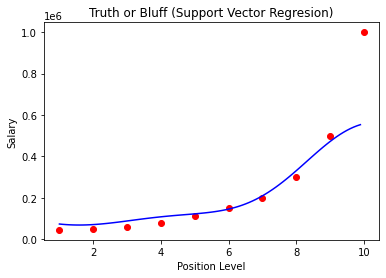

In [31]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regresion)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

"plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')"

Important steps to understand:
1. plt.plot(X_grid, regressor.predict(X_grid) )

This is the original code line. Notice, X_grid is the orignal scale here. So that can be left untouched. 


2. "plt.plot(X_grid, regressor.predict(sc_X.transform(X_grid)) )"

We add the above chuck in the predict function because X_grid is in the orginal scale and we want to convert it back into the transformed scale. So we apply the transform function to it.


3. "plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))) )"

We add the sc_y.inverse_tranform to the regressor because the regressor is in the transformed scale and we need to convert it back into the original scale. 


### This finishes our study on the SVR Model.